## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, cos, sin, asin, sqrt
import datetime as dt
import re

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 60)
pd.set_option("display.max_rows", 500)
%matplotlib inline

In [2]:
def plot_barchart(figsize_tuple, df, feature, filename):
    # Plot barchart
    plt.figure(figsize=figsize_tuple)
    sns.countplot(y=feature, data=df, orient='v',
                  order=df[feature].value_counts().iloc[:10].index)

    plt.title('Top 10 {}'.format(feature), fontsize=12)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel('{}'.format(feature), fontsize=12)
    plt.savefig('../images/01a-eda-admin/{}.png'.format(filename), transparent=True)
    
def plot_histogram(figsize_tuple, df, feature, filename):
    plt.figure(figsize=figsize_tuple)
    sns.distplot(df[feature].dropna())

    plt.title('Histogram of {}'.format(feature), fontsize=12)
    plt.xlabel('{}'.format(feature), fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.savefig('../images/01a-eda-admin/{}.png'.format(filename), transparent=True)

## Read data

In [3]:
admin = pd.read_csv('../AirTracks/all_csv/Jan2017/admin.csv')

In [4]:
admin.head()

,FlightId,FlightCallsign,AircraftModel,AircraftRegistration,Airline,Origin,Destination,SchdeuledDeparture,ScheduledArrival,RealDeparture,EstimatedArrival,FlightTime
0,c244ac4,SAS1749,ATR 72-600,OY-JZE,SAS,Tallinn Lennart Meri Airport,Stockholm Arlanda Airport,1.484156e+09,1.484161e+09,1.484159e+09,NaN,3762.0
1,c32d217,OKA2925,Boeing 737-8AS,B-5578,OKAir,Changsha Huanghua International Airport,Hangzhou Xiaoshan International Airport,1.484694e+09,1.484698e+09,1.484694e+09,1.484698e+09,3850.0
2,c326787,TAR713,Airbus A320-214,TS-IMW,Tunisair,Tunis Carthage International Airport,Jeddah King Abdulaziz International Airport,1.484678e+09,1.484694e+09,1.484681e+09,1.484695e+09,13929.0
3,c35d480,RYR71SN,Boeing 737-8AS,EI-FRJ,Ryanair,Madrid Barajas Airport,Brussels South Charleroi Airport,1.484804e+09,1.484813e+09,1.484805e+09,1.484813e+09,7154.0
4,c3705bd,BSX844,Airbus A320-214,XU-112,Bassaka Air,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN


In [5]:
# Check for duplicates
admin[admin.duplicated()]

,FlightId,FlightCallsign,AircraftModel,AircraftRegistration,Airline,Origin,Destination,SchdeuledDeparture,ScheduledArrival,RealDeparture,EstimatedArrival,FlightTime


## Rename columns

In [6]:
admin.rename(columns={
    'FlightId': 'flight_id',
    'FlightCallsign': 'flight_callsign',
    'AircraftModel': 'aircraft_model',
    'AircraftRegistration': 'aircraft_registration',
    'SchdeuledDeparture': 'scheduled_departure_utc',
    'ScheduledArrival': 'scheduled_arrival_utc',
    'RealDeparture': 'real_departure_utc',
    'EstimatedArrival': 'estimated_arrival_utc',
    'FlightTime': 'real_flight_duration'
     }, inplace=True)

admin.columns = admin.columns.map(lambda x: x.lower())

In [7]:
admin.dtypes

flight_id                   object
flight_callsign             object
aircraft_model              object
aircraft_registration       object
airline                     object
origin                      object
destination                 object
scheduled_departure_utc    float64
scheduled_arrival_utc      float64
real_departure_utc         float64
estimated_arrival_utc      float64
real_flight_duration       float64
dtype: object

In [8]:
admin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158127 entries, 0 to 1158126
Data columns (total 12 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   flight_id                1158127 non-null  object 
 1   flight_callsign          1154276 non-null  object 
 2   aircraft_model           1139309 non-null  object 
 3   aircraft_registration    1137386 non-null  object 
 4   airline                  1134018 non-null  object 
 5   origin                   1116766 non-null  object 
 6   destination              1069335 non-null  object 
 7   scheduled_departure_utc  1134589 non-null  float64
 8   scheduled_arrival_utc    1134589 non-null  float64
 9   real_departure_utc       1093809 non-null  float64
 10  estimated_arrival_utc    655160 non-null   float64
 11  real_flight_duration     997747 non-null   float64
dtypes: float64(5), object(7)
memory usage: 106.0+ MB


In [9]:
admin.isnull().sum()

flight_id                       0
flight_callsign              3851
aircraft_model              18818
aircraft_registration       20741
airline                     24109
origin                      41361
destination                 88792
scheduled_departure_utc     23538
scheduled_arrival_utc       23538
real_departure_utc          64318
estimated_arrival_utc      502967
real_flight_duration       160380
dtype: int64

In [10]:
# Percentage missing
admin.isnull().sum() / admin.shape[0] * 100

flight_id                   0.000000
flight_callsign             0.332520
aircraft_model              1.624865
aircraft_registration       1.790909
airline                     2.081723
origin                      3.571370
destination                 7.666862
scheduled_departure_utc     2.032420
scheduled_arrival_utc       2.032420
real_departure_utc          5.553622
estimated_arrival_utc      43.429348
real_flight_duration       13.848222
dtype: float64

## Handle data of object type

In [11]:
str_cols = admin.columns[admin.dtypes==object]

In [12]:
# Fill NaN with 'EMPTY' so that seaborn will factor in NaN cells
admin[str_cols] = admin[str_cols].fillna('EMPTY')

In [13]:
# Strip leading and trailing spaces in object columns
admin[str_cols] = admin[str_cols].apply(lambda x: x.str.strip())

**flight_id**

In [14]:
admin['flight_id'].value_counts(dropna=False)

c388abd    1
c3e6bdf    1
c42f0b8    1
c478703    1
c3d01ce    1
          ..
c4df00e    1
c1bb727    1
c3bbe35    1
c3ad360    1
c229340    1
Name: flight_id, Length: 1158127, dtype: int64

In [15]:
# Check that the number of unique flights = number of rows i.e. each row is a unique flight
len(admin['flight_id'].unique()) == admin['flight_id'].value_counts().values.sum()

True

In [16]:
admin[(admin['flight_id'] == 'EMPTY') | (admin['flight_id'].isnull())]

,flight_id,flight_callsign,aircraft_model,aircraft_registration,airline,origin,destination,scheduled_departure_utc,scheduled_arrival_utc,real_departure_utc,estimated_arrival_utc,real_flight_duration


**flight_callsign**

In [17]:
admin['flight_callsign'].value_counts()

Blocked     5166
EMPTY       3851
N            103
SQB02ERA      66
LEADER5       63
            ... 
GLP1147        1
YZR7083        1
TAY92G         1
GEENO          1
N971SR         1
Name: flight_callsign, Length: 117101, dtype: int64

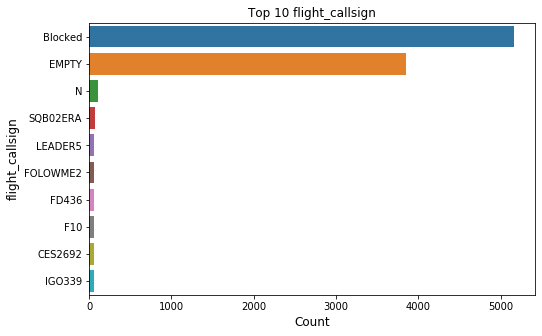

In [18]:
plot_barchart((8,5), admin, 'flight_callsign', '01-barchart-flight_callsign')

**aircraft_model**

In [19]:
admin['aircraft_model'].value_counts()

Airbus A320-214               148420
Airbus A320-232                97776
Airbus A321-231                47523
Boeing 737-8AS                 44169
Airbus A319-111                25339
                               ...  
Diamond Katana DA20-C1             1
Eurostar EV-97                     1
Procaer F-15B Picchio              1
Reims Cessna FR172G Rocket         1
Piper PA-24-260 Comanche           1
Name: aircraft_model, Length: 3658, dtype: int64

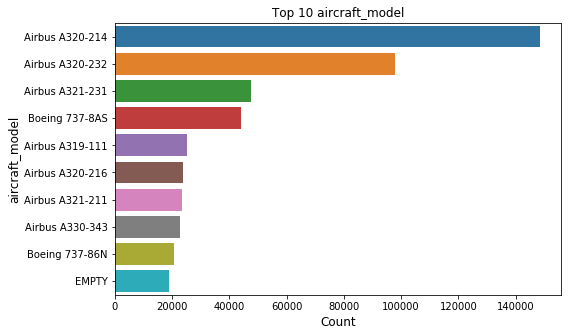

In [20]:
plot_barchart((8,5), admin, 'aircraft_model', '02-barchart-aircraft_model')

**aircraft_registration**

In [21]:
admin['aircraft_registration'].value_counts()

EMPTY     20741
TC-FHY      169
HA-LPL      166
HS-DBX      166
VT-ATB      163
          ...  
PH-SFT        1
N21AG         1
HB-EQG        1
D-EFKM        1
G-AVMF        1
Name: aircraft_registration, Length: 26734, dtype: int64

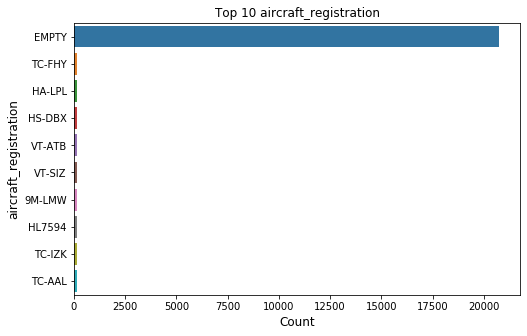

In [22]:
plot_barchart((8,5), admin, 'aircraft_registration', '03-barchart-aircraft-registration')

**airline**

In [23]:
admin['airline'].value_counts()

Ryanair                         38650
China Southern Airlines         36107
China Eastern Airlines          35002
Air China                       24647
EMPTY                           24109
                                ...  
Auto Rom                            1
Century Aviation                    1
Jolin Holding en Advies B.V.        1
Focus Aviation                      1
MN Solutions (Cambridge) Ltd        1
Name: airline, Length: 2665, dtype: int64

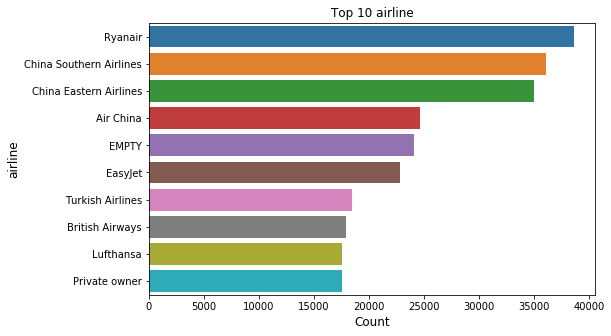

In [24]:
plot_barchart((8,5), admin, 'airline', '04-barchart-airline')

**origin**

In [25]:
admin['origin'].value_counts()

EMPTY                                          41361
Beijing Capital International Airport          18695
Shanghai Pudong International Airport          16367
Hong Kong International Airport                14585
London Heathrow Airport                        14157
                                               ...  
Quilpie Airport                                    1
Pajala Airport                                     1
Johannesburg Lanseria International Airport        1
West Palm Beach International Airport              1
Blantyre Chileka International Airport             1
Name: origin, Length: 2083, dtype: int64

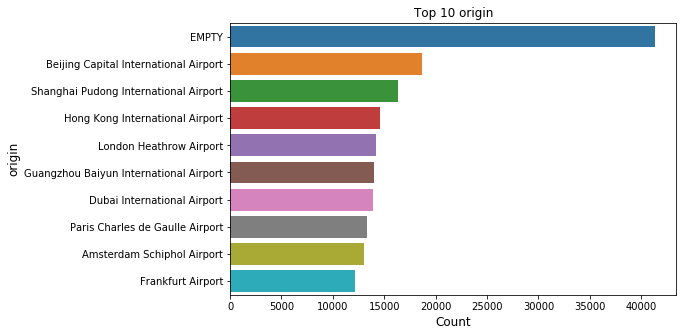

In [26]:
plot_barchart((8,5), admin, 'origin', '05-barchart-origin')

**destination**

In [27]:
admin['destination'].value_counts()

EMPTY                                     88792
Beijing Capital International Airport     18399
Shanghai Pudong International Airport     15908
London Heathrow Airport                   14682
Guangzhou Baiyun International Airport    14068
                                          ...  
Basel                                         1
Bole Alashankou Airport                       1
Port Harcourt International Airport           1
Vung Tau Airport                              1
North Ronaldsay Airport                       1
Name: destination, Length: 2146, dtype: int64

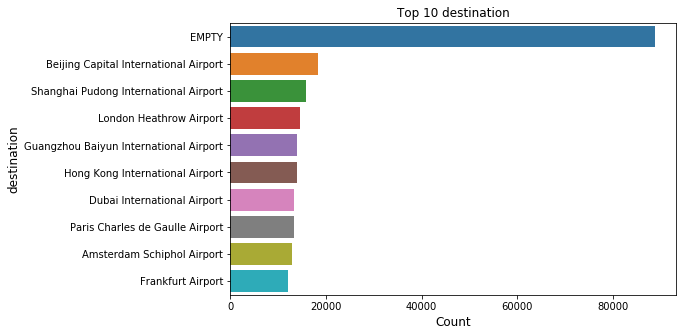

In [28]:
plot_barchart((8,5), admin, 'destination', '06-barchart-destination')

## Dates

**Convert to datetime**

In [29]:
admin['scheduled_departure_dt'] = pd.to_datetime(admin['scheduled_departure_utc'], unit='s')
admin['scheduled_arrival_dt'] = pd.to_datetime(admin['scheduled_arrival_utc'], unit='s')
admin['real_departure_dt'] = pd.to_datetime(admin['real_departure_utc'], unit='s')
admin['estimated_arrival_dt'] = pd.to_datetime(admin['estimated_arrival_utc'], unit='s')

In [30]:
# Dates with year = 1970 => INVALID
admin[admin['scheduled_departure_dt'].dt.year == 1970].shape

(128300, 16)

Observation: There are some dates where year = 1970. Check if there are dates that do not fall within Jan 2017

**Deal with rows with dates that are in 1970**

In [31]:
def replace_with_NaT(val):
    if val.year == 1970:
        return pd.NaT
    else:
        return val

# Replace dates that are in year 1970
admin['scheduled_departure_dt'] = admin['scheduled_departure_dt'].map(replace_with_NaT)
admin['scheduled_arrival_dt'] = admin['scheduled_arrival_dt'].map(replace_with_NaT)
admin['real_departure_dt'] = admin['real_departure_dt'].map(replace_with_NaT)
admin['estimated_arrival_dt'] = admin['estimated_arrival_dt'].map(replace_with_NaT)

# Convert back to UTC
admin['scheduled_departure_utc'] = (admin['scheduled_departure_dt'] - dt.datetime(1970,1,1)).dt.total_seconds()
admin['scheduled_arrival_utc'] = (admin['scheduled_arrival_dt'] - dt.datetime(1970,1,1)).dt.total_seconds()
admin['real_departure_utc'] = (admin['real_departure_dt'] - dt.datetime(1970,1,1)).dt.total_seconds()
admin['estimated_arrival_utc'] = (admin['estimated_arrival_dt'] - dt.datetime(1970,1,1)).dt.total_seconds()

In [32]:
# admin['scheduled_arrival_year'] = admin['scheduled_arrival_dt'].dt.year.astype('Int64')
# admin['scheduled_arrival_month'] = admin['scheduled_arrival_dt'].dt.month.astype('Int64')
# admin['scheduled_arrival_day'] = admin['scheduled_arrival_dt'].dt.day.astype('Int64')

# admin['scheduled_departure_year'] = admin['scheduled_departure_dt'].dt.year.astype('Int64')
# admin['scheduled_departure_month'] = admin['scheduled_departure_dt'].dt.month.astype('Int64')
# admin['scheduled_departure_day'] = admin['scheduled_departure_dt'].dt.day.astype('Int64')

In [33]:
# admin['scheduled_arrival_dt'].dt.year.value_counts(dropna=False).sort_index()

In [34]:
scheduled_arrival_missing_index = admin.loc[admin['scheduled_arrival_dt'].isnull(), 'scheduled_arrival_dt'].index.tolist()
scheduled_departure_missing_index = admin.loc[admin['scheduled_departure_dt'].isnull(), 'scheduled_departure_dt'].index.tolist()
estimated_arrival_missing_index = admin.loc[admin['estimated_arrival_dt'].isnull(), 'estimated_arrival_dt'].index.tolist()
real_departure_missing_index = admin.loc[admin['real_departure_dt'].isnull(), 'real_departure_dt'].index.tolist()

real_flight_duration_missing_index = admin[admin['real_flight_duration'].isnull()].index.tolist()

In [35]:
print(len(real_flight_duration_missing_index))
print(len(real_departure_missing_index))
print(len(set(real_flight_duration_missing_index).intersection(real_departure_missing_index)))

160380
64318
40619


In [36]:
print(len(scheduled_departure_missing_index))
print(len(scheduled_arrival_missing_index))
print(np.array_equal(scheduled_departure_missing_index, scheduled_arrival_missing_index))

151838
151838
True


Observation: Rows with NaT for scheduled_arrival_dt also had NaT for scheduled_departure_dt

In [37]:
print(len(estimated_arrival_missing_index))
print(len(list(set(estimated_arrival_missing_index).intersection(set(scheduled_departure_missing_index)))))

502967
123294


Observation: EstimatedArrival shares common missing values for ScheduledArrival and ScheduledDeparture

In [38]:
print(len(estimated_arrival_missing_index))
print(len(real_departure_missing_index))

502967
64318


In [39]:
print(np.array_equal(estimated_arrival_missing_index, real_departure_missing_index))
print(len(list(set(real_departure_missing_index).intersection(set(estimated_arrival_missing_index)))))

False
54251


Observation: RealDeparture has 54251 common missing values with EstimatedArrival

**real_flight_duration**

In [40]:
admin['real_flight_duration'].isnull().sum()

160380

In [41]:
admin['real_flight_duration'].min(), admin['real_flight_duration'].max()

(0.0, 80947.0)

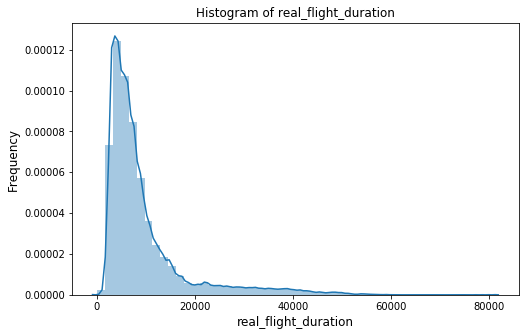

In [42]:
plot_histogram((8, 5), admin, 'real_flight_duration', '07-histogram-real_flight_duration')

real_flight_duration is not normally distributed and its distribution is right-skewed.

In [43]:
# (admin['estimated_arrival'] - admin['real_departure'])[1].total_seconds()
(admin['estimated_arrival_utc'] - admin['real_departure_utc'])[1]

4135.0

In [44]:
admin.real_flight_duration[1]

3850.0

real_flight_duration < (estimated_arrival - real_departure) for row 1 implying that the values don't match up

**scheduled_departure_dt**

In [45]:
admin['scheduled_departure_dt'].isnull().sum()

151838

In [46]:
admin['scheduled_departure_dt'].min(), admin['scheduled_departure_dt'].max()

(Timestamp('2016-12-30 15:05:00'), Timestamp('2017-01-31 16:20:00'))

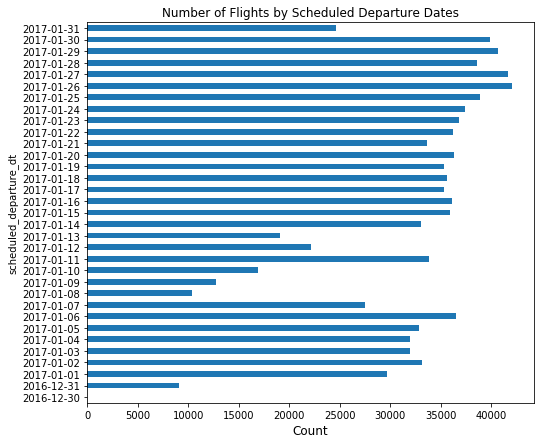

In [47]:
plt.figure(figsize=(8, 7))
admin.groupby(admin["scheduled_departure_dt"].dt.date)['flight_id'].count().plot(kind="barh")
plt.title('Number of Flights by Scheduled Departure Dates', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.savefig('../images/01a-eda-admin/08-barchart-scheduled_departure_dt.png', transparent=True)

2017-01-26 has the most number of scheduled departing flights.

In [48]:
admin[admin['scheduled_departure_dt'].dt.date == dt.date(2016, 12, 30)].shape

(7, 16)

**scheduled_arrival_dt**

In [49]:
admin['scheduled_arrival_dt'].isnull().sum()

151838

In [50]:
admin['scheduled_arrival_dt'].min(), admin['scheduled_arrival_dt'].max()

(Timestamp('2016-12-30 16:30:00'), Timestamp('2017-02-01 03:15:00'))

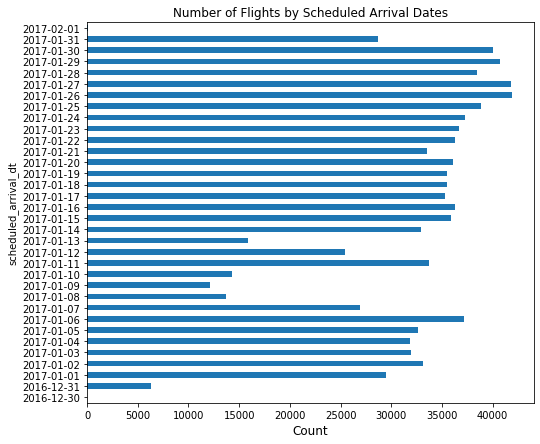

In [51]:
plt.figure(figsize=(8, 7))
admin.groupby(admin["scheduled_arrival_dt"].dt.date)['flight_id'].count().plot(kind="barh")
plt.title('Number of Flights by Scheduled Arrival Dates', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.savefig('../images/01a-eda-admin/09-barchart-scheduled_arrival_dt.png', transparent=True)

2017-01-26 has the most number of scheduled arriving flights.

In [52]:
admin[admin['scheduled_arrival_dt'].dt.date == dt.date(2016, 12, 30)].shape

(2, 16)

In [53]:
admin[admin['scheduled_arrival_dt'].dt.date == dt.date(2017, 2, 1)].shape

(40, 16)

**real_departure_dt**

In [54]:
admin['real_departure_dt'].dt.year.value_counts(dropna=False)

2017.0    1084480
NaN         64318
2016.0       9329
Name: real_departure_dt, dtype: int64

In [55]:
admin['real_departure_dt'].min(), admin['real_departure_dt'].max()

(Timestamp('2016-12-31 00:52:07'), Timestamp('2017-01-31 15:25:31'))

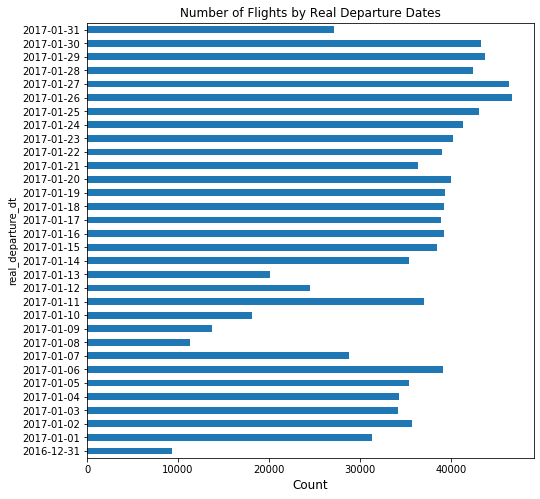

In [56]:
plt.figure(figsize=(8, 8))
admin.groupby(admin["real_departure_dt"].dt.date)['flight_id'].count().plot(kind="barh")
plt.title('Number of Flights by Real Departure Dates', fontsize=12)
plt.xlabel('Count', fontsize=12);
plt.savefig('../images/01a-eda-admin/10-barchart-real_departure_dt.png', transparent=True)

2017-01-26 has the most number of actual departing flights.

In [57]:
# admin.dropna(subset=['real_departure_dt'], inplace=True)

**estimated_arrival_dt**

In [58]:
admin['estimated_arrival_dt'].dt.year.value_counts(dropna=False)

2017.0    650839
NaN       502967
2016.0      4321
Name: estimated_arrival_dt, dtype: int64

In [59]:
admin['estimated_arrival_dt'].min(), admin['estimated_arrival_dt'].max()

(Timestamp('2016-12-31 13:51:54'), Timestamp('2017-02-01 04:01:04'))

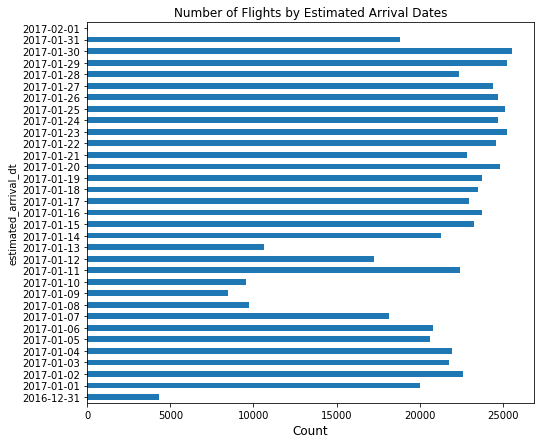

In [60]:
plt.figure(figsize=(8, 7))
admin.groupby(admin["estimated_arrival_dt"].dt.date)['flight_id'].count().plot(kind="barh")
plt.title('Number of Flights by Estimated Arrival Dates', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.savefig('../images/01a-eda-admin/11-barchart-estimated_arrival_dt.png', transparent=True)

In [61]:
admin[admin['estimated_arrival_dt'].dt.date == dt.date(2017, 2, 1)].shape

(30, 16)

**scheduled_flight_duration**

In [62]:
admin['scheduled_flight_duration'] = admin['scheduled_arrival_utc'] - admin['scheduled_departure_utc']

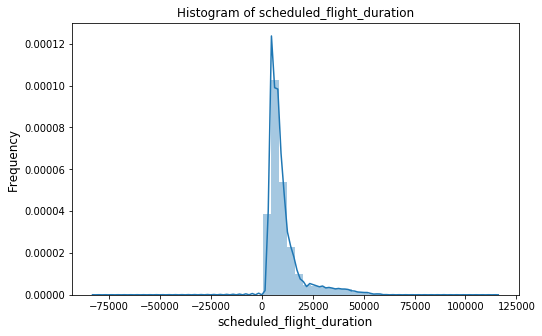

In [63]:
plot_histogram((8, 5), admin, 'scheduled_flight_duration', '12-histogram-scheduled_flight_duration')

In [64]:
admin[admin['scheduled_flight_duration'] < 0].shape

(51, 17)

51 records where each of them have scheduled_arrival_utc earlier than scheduled scheduled_departure_utc which is not realistic.

In [65]:
# def cast_zero_to_nan(val):
#     if int(val) == 0:
#         return np.nan
#     else:
#         return val
    
# admin['scheduled_flight_duration'] = admin['scheduled_flight_duration'].map(cast_zero_to_nan)

## Route

In [66]:
admin['route'] = admin.origin + " -> " + admin.destination

In [67]:
admin.loc[~admin['route'].str.contains('EMPTY') ,'route'].value_counts()[:20]

Seoul Gimpo International Airport -> Jeju International Airport                                  2058
Jeju International Airport -> Seoul Gimpo International Airport                                  1971
Sydney Kingsford Smith Airport -> Melbourne Airport                                              1554
Ho Chi Minh City International Airport -> Hanoi Noi Bai International Airport                    1466
Melbourne Airport -> Sydney Kingsford Smith Airport                                              1454
Hanoi Noi Bai International Airport -> Ho Chi Minh City International Airport                    1402
Delhi Indira Gandhi International Airport -> Mumbai Chhatrapati Shivaji International Airport    1233
Mumbai Chhatrapati Shivaji International Airport -> Delhi Indira Gandhi International Airport    1195
Taiwan Taoyuan International Airport -> Hong Kong International Airport                          1151
Hong Kong International Airport -> Taiwan Taoyuan International Airport           

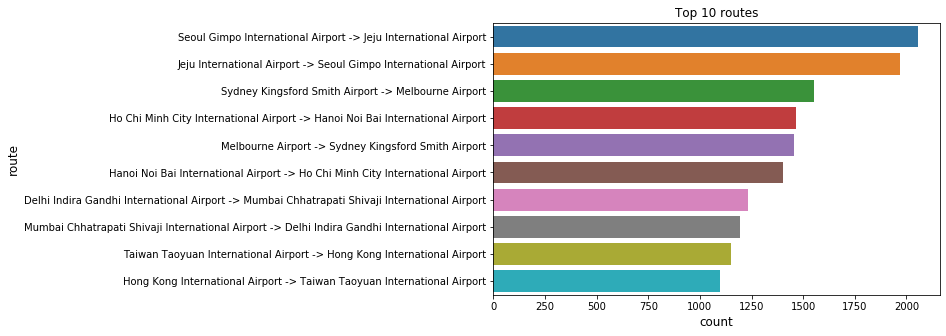

In [68]:
# Plot barchart
plt.figure(figsize=(8, 5))
sns.countplot(y='route', data=admin[~admin['route'].str.contains('EMPTY')], orient='v',
              order=admin.loc[~admin['route'].str.contains('EMPTY') ,'route'].value_counts()[:10].index)

plt.title('Top 10 routes', fontsize=12)
plt.xlabel('count', fontsize=12)
plt.ylabel('route', fontsize=12)

plt.savefig('../images/01a-eda-admin/13-barchart-route.png', transparent=True)

Taiwan Taoyuan International Airport -> Hong Kong International Airport is chosen as the route for analysis as it's the top international route.

In [69]:
admin.isnull().sum()

flight_id                         0
flight_callsign                   0
aircraft_model                    0
aircraft_registration             0
airline                           0
origin                            0
destination                       0
scheduled_departure_utc      151838
scheduled_arrival_utc        151838
real_departure_utc            64318
estimated_arrival_utc        502967
real_flight_duration         160380
scheduled_departure_dt       151838
scheduled_arrival_dt         151838
real_departure_dt             64318
estimated_arrival_dt         502967
scheduled_flight_duration    151838
route                             0
dtype: int64

## Arrivals at Hong Kong International Airport

In [70]:
df_arrivals_at_hkg = admin[admin['destination'] == 'Hong Kong International Airport']
df_arrivals_at_hkg.reset_index(inplace=True, drop=True)
df_arrivals_at_hkg.head(2)

,flight_id,flight_callsign,aircraft_model,aircraft_registration,airline,origin,destination,scheduled_departure_utc,scheduled_arrival_utc,real_departure_utc,estimated_arrival_utc,real_flight_duration,scheduled_departure_dt,scheduled_arrival_dt,real_departure_dt,estimated_arrival_dt,scheduled_flight_duration,route
0,c37d285,CAL680,Airbus A330-302,B-18302,China Airlines,Jakarta Soekarno Hatta International Airport,Hong Kong International Airport,1.484869e+09,1.484885e+09,1.484871e+09,NaN,15588.0,2017-01-19 23:35:00,2017-01-20 04:10:00,2017-01-20 00:01:56,NaT,16500.0,Jakarta Soekarno Hatta International Airport -...
1,c1774c7,CPA3259,Boeing 747-467F(ER),B-LID,Cathay Pacific Cargo,Shanghai Pudong International Airport,Hong Kong International Airport,1.483675e+09,1.483685e+09,1.483677e+09,NaN,7960.0,2017-01-06 03:50:00,2017-01-06 06:50:00,2017-01-06 04:21:57,NaT,10800.0,Shanghai Pudong International Airport -> Hong ...


In [71]:
df_arrivals_at_hkg.shape

(14007, 18)

In [72]:
df_arrivals_at_hkg.isnull().sum()

flight_id                       0
flight_callsign                 0
aircraft_model                  0
aircraft_registration           0
airline                         0
origin                          0
destination                     0
scheduled_departure_utc       605
scheduled_arrival_utc         605
real_departure_utc             92
estimated_arrival_utc        8328
real_flight_duration          590
scheduled_departure_dt        605
scheduled_arrival_dt          605
real_departure_dt              92
estimated_arrival_dt         8328
scheduled_flight_duration     605
route                           0
dtype: int64

In [73]:
# df_arrivals_at_hkg.dropna(subset=['real_departure_dt'], inplace=True)

In [74]:
df_arrivals_at_hkg['scheduled_departure_dt'].dt.year.value_counts(dropna=False).sort_index()

2016.0      155
2017.0    13247
NaN         605
Name: scheduled_departure_dt, dtype: int64

In [75]:
df_arrivals_at_hkg['scheduled_arrival_dt'].dt.year.value_counts(dropna=False).sort_index()

2016.0       71
2017.0    13331
NaN         605
Name: scheduled_arrival_dt, dtype: int64

In [76]:
df_arrivals_at_hkg['real_departure_dt'].dt.year.value_counts(dropna=False).sort_index()

2016.0      152
2017.0    13763
NaN          92
Name: real_departure_dt, dtype: int64

In [77]:
df_arrivals_at_hkg['estimated_arrival_dt'].dt.year.value_counts(dropna=False).sort_index()

2016.0      33
2017.0    5646
NaN       8328
Name: estimated_arrival_dt, dtype: int64

In [78]:
# df_arrivals_at_hkg.loc[(df_arrivals_at_hkg['origin'] == 'Taiwan Taoyuan International Airport') &
#                        (df_arrivals_at_hkg['real_flight_duration'].isnull())]

In [79]:
# Impute missing information using median based on origin
df_arrivals_at_hkg['scheduled_flight_duration'] = df_arrivals_at_hkg.groupby("origin")['scheduled_flight_duration'].transform(lambda x: x.fillna(x.median()))
df_arrivals_at_hkg['real_flight_duration'] = df_arrivals_at_hkg.groupby("origin")['real_flight_duration'].transform(lambda x: x.fillna(x.median()))

**Using estimated arrival as benchmark**

In [80]:
# (df_arrivals_at_hkg['estimated_arrival_dt'].fillna(df_arrivals_at_hkg['real_departure_dt'] + 
#                                                     pd.to_timedelta(df_arrivals_at_hkg['real_flight_duration'], unit='s'))).isnull().sum()

# # replace estimated arrival

# df_arrivals_at_hkg['forecasted_arrival_dt'] = \
# df_arrivals_at_hkg['estimated_arrival_dt']\
# .fillna(df_arrivals_at_hkg['real_departure_dt'] + pd.to_timedelta(df_arrivals_at_hkg['real_flight_duration'], unit='s'))\
# .fillna(df_arrivals_at_hkg['real_departure_dt'] + pd.to_timedelta(df_arrivals_at_hkg['scheduled_flight_duration'], unit='s'))\
# .fillna(df_arrivals_at_hkg['scheduled_arrival_dt'])\
# .fillna(df_arrivals_at_hkg['scheduled_departure_dt'] + pd.to_timedelta(df_arrivals_at_hkg['real_flight_duration'], unit='s'))

# df_arrivals_at_hkg['forecasted_arrival_dt'].isnull().sum()

**Using real departure as benchmark**

In [81]:
df_arrivals_at_hkg['forecasted_arrival_dt'] = \
(df_arrivals_at_hkg['real_departure_dt'] + pd.to_timedelta(df_arrivals_at_hkg['real_flight_duration'], unit='s'))\
.fillna(df_arrivals_at_hkg['real_departure_dt'] + pd.to_timedelta(df_arrivals_at_hkg['scheduled_flight_duration'], unit='s'))\
.fillna(df_arrivals_at_hkg['scheduled_departure_dt'] + pd.to_timedelta(df_arrivals_at_hkg['real_flight_duration'], unit='s'))\
.fillna(df_arrivals_at_hkg['scheduled_arrival_dt'])\
.fillna(df_arrivals_at_hkg['estimated_arrival_dt'])

In [82]:
# remove records where forecasted_arrival_dt is null
df_arrivals_at_hkg = df_arrivals_at_hkg[~df_arrivals_at_hkg['forecasted_arrival_dt'].isnull()]

In [83]:
df_arrivals_at_hkg.shape

(13906, 19)

101 records removed.

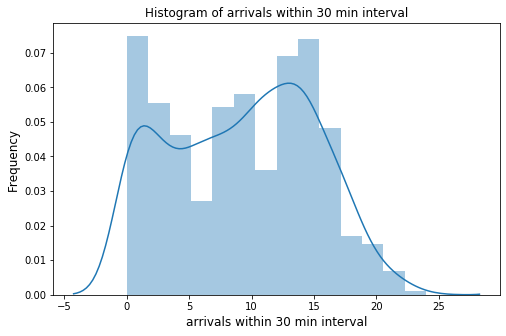

In [84]:
df_arrivals_per_30_min = df_arrivals_at_hkg.set_index('forecasted_arrival_dt').resample('30Min').count().reset_index()\
[['forecasted_arrival_dt', 'flight_id']]
df_arrivals_per_30_min.rename(columns={'flight_id': 'arrivals'}, inplace=True)
df_arrivals_per_30_min.set_index('forecasted_arrival_dt', inplace=True)

# Plot histogram of arrivals within 30 min interval
plt.figure(figsize=(8, 5))
sns.distplot(df_arrivals_per_30_min['arrivals'].dropna())

plt.title('Histogram of arrivals within 30 min interval', fontsize=12)
plt.xlabel('arrivals within 30 min interval', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.savefig('../images/01a-eda-admin/14-histogram-arrivals_within_30_min_intervals.png', transparent=True)

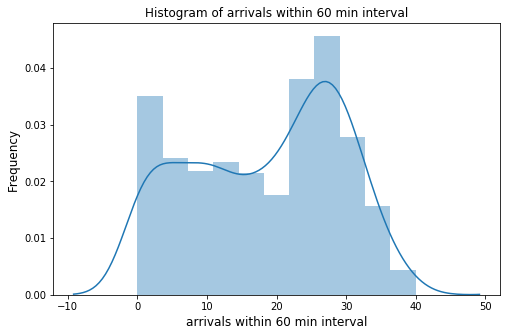

In [85]:
df_arrivals_per_60_min = df_arrivals_at_hkg.set_index('forecasted_arrival_dt').resample('60Min').count().reset_index()\
[['forecasted_arrival_dt', 'flight_id']]
df_arrivals_per_60_min.rename(columns={'flight_id': 'arrivals'}, inplace=True)
df_arrivals_per_60_min.set_index('forecasted_arrival_dt', inplace=True)

# Plot histogram of arrivals within 30 min interval
plt.figure(figsize=(8, 5))
sns.distplot(df_arrivals_per_60_min['arrivals'].dropna())

plt.title('Histogram of arrivals within 60 min interval', fontsize=12)
plt.xlabel('arrivals within 60 min interval', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.savefig('../images/01a-eda-admin/15-histogram-arrivals_within_60_min_intervals.png', transparent=True)

In [86]:
df_arrivals_at_hkg['forecasted_arrival_dt_nearest_hr'] = df_arrivals_at_hkg['forecasted_arrival_dt'].apply(lambda x: dt.datetime(x.year, x.month, x.day, x.hour,60*(x.minute // 60)))
df_arrivals_at_hkg['forecasted_arrival_dt_nearest_hr'].head()

0   2017-01-20 04:00:00
1   2017-01-06 06:00:00
2   2017-01-03 09:00:00
3   2017-01-26 09:00:00
4   2017-01-15 03:00:00
Name: forecasted_arrival_dt_nearest_hr, dtype: datetime64[ns]

In [87]:
df_arrivals_at_hkg['arrivals'] = df_arrivals_at_hkg['forecasted_arrival_dt_nearest_hr'].map(df_arrivals_per_60_min.to_dict()['arrivals'])

In [88]:
# df_arrivals_at_hkg.loc[df_arrivals_at_hkg['forecasted_arrival_dt'].isnull(), 
#                        ['flight_id', 'estimated_arrival_utc', 'real_flight_duration', 
#                         'scheduled_departure_dt', 'scheduled_arrival_dt',
#                         'real_departure_dt', 'estimated_arrival_dt', 'scheduled_flight_duration',
#                         'forecasted_arrival_dt']].sort_values(by='real_departure_dt')

## Filter for flights between Taiwan Taoyuan International Airport to Hong Kong International Airport

In [89]:
df_twn_to_hkg = df_arrivals_at_hkg[df_arrivals_at_hkg['origin'] == 'Taiwan Taoyuan International Airport']

In [90]:
scheduled_arrival_missing_index = df_twn_to_hkg.loc[df_twn_to_hkg['scheduled_arrival_dt'].isnull(), 'scheduled_arrival_dt'].index.tolist()

scheduled_departure_missing_index = df_twn_to_hkg.loc[df_twn_to_hkg['scheduled_departure_dt'].isnull(), 'scheduled_departure_dt'].index.tolist()

estimated_arrival_missing_index = df_twn_to_hkg.loc[df_twn_to_hkg['estimated_arrival_dt'].isnull(), 'estimated_arrival_dt'].index.tolist()

real_departure_missing_index = df_twn_to_hkg.loc[df_twn_to_hkg['real_departure_dt'].isnull(), 'real_departure_dt'].index.tolist()

real_flight_duration_missing_index = df_twn_to_hkg.loc[df_twn_to_hkg['real_flight_duration'].isnull(), 'real_flight_duration'].index.tolist()
scheduled_flight_duration_missing_index = df_twn_to_hkg.loc[df_twn_to_hkg['scheduled_flight_duration'].isnull(), 'scheduled_flight_duration'].index.tolist()

In [91]:
print(len(scheduled_departure_missing_index))
print('')

print(len(scheduled_arrival_missing_index))
print('')

print(len(estimated_arrival_missing_index))
print('')

print(len(real_departure_missing_index))
print('')

print(len(real_flight_duration_missing_index))
print(len(scheduled_flight_duration_missing_index))

31

31

772

3

0
0


In [92]:
print(np.array_equal(scheduled_departure_missing_index, 
                     scheduled_arrival_missing_index))

True


**Observation: Rows with NaT for scheduled_arrival_dt also had NaT for scheduled_departure_dt**

In [93]:
print(len(estimated_arrival_missing_index))
print(len(list(set(estimated_arrival_missing_index).intersection(set(scheduled_departure_missing_index)))))

772
26


**Observation: EstimatedArrival shares common missing values for ScheduledArrival and ScheduledDeparture**

In [94]:
print(len(estimated_arrival_missing_index))
print(len(real_departure_missing_index))

772
3


In [95]:
print(np.array_equal(estimated_arrival_missing_index, real_departure_missing_index))
print(len(list(set(real_departure_missing_index).intersection(set(estimated_arrival_missing_index)))))

False
3


In [96]:
print(len(list(set(real_departure_missing_index)
               .intersection(set(real_flight_duration_missing_index)))))

0


**Drop rows with no origin information**

In [97]:
# Drop origin == 'EMPTY'
flight_id_no_origin = df_arrivals_at_hkg.loc[df_arrivals_at_hkg['origin']=='EMPTY', 'flight_id'].values.tolist()
flight_id_no_origin = list(set(flight_id_no_origin))
flight_id_no_origin

[]

In [98]:
# df_arrivals_at_hkg = df_arrivals_at_hkg[~df_arrivals_at_hkg.flight_id.isin(flight_id_no_origin)]

**Handle flights with no real_flight_duration**

In [99]:
# Flights with NaN for real_flight_duration
set_null_real_flight_dur_origin = set(df_twn_to_hkg.loc[df_twn_to_hkg['real_flight_duration'].isnull(), 'origin'].unique())
df_twn_to_hkg.loc[df_twn_to_hkg['real_flight_duration'].isnull(), 'origin'].value_counts().sort_index()

Series([], Name: origin, dtype: int64)

In [100]:
# Flights with values for real_flight_duration
df_twn_to_hkg.loc[~df_twn_to_hkg['real_flight_duration'].isnull(), 'origin'].value_counts().sort_index()

Taiwan Taoyuan International Airport    1150
Name: origin, dtype: int64

In [101]:
set_real_flight_dur_origin = set(df_twn_to_hkg.loc[~df_twn_to_hkg['real_flight_duration'].isnull(), 'origin'].unique())

In [102]:
# Flights with NaN for real_flight_duration but no flights with matching origin
set_null_real_flight_dur_origin - set_null_real_flight_dur_origin.intersection(set_real_flight_dur_origin)

set()

In [103]:
set_null_real_flight_dur_origin = set(df_twn_to_hkg.loc[df_twn_to_hkg['real_flight_duration'].isnull(), 'origin'].unique())
df_twn_to_hkg.loc[df_twn_to_hkg['real_flight_duration'].isnull(), 'origin'].value_counts().sort_index()

Series([], Name: origin, dtype: int64)

In [104]:
df_twn_to_hkg.shape

(1150, 21)

In [105]:
df_twn_to_hkg.loc[df_twn_to_hkg['real_departure_dt'].isnull(), ['origin', 'scheduled_departure_dt']]

,origin,scheduled_departure_dt
2036,Taiwan Taoyuan International Airport,2017-01-29 13:50:00
4506,Taiwan Taoyuan International Airport,2017-01-15 05:20:00
12389,Taiwan Taoyuan International Airport,2017-01-20 04:50:00


In [106]:
df_twn_to_hkg['real_departure_dt'] = df_twn_to_hkg['real_departure_dt'].fillna(df_twn_to_hkg['scheduled_departure_dt'])

In [107]:
df_twn_to_hkg.to_csv('../data/admin_twn_to_hkg.csv')